In [21]:

import requests 
import matplotlib.pyplot as plt
import csv
import json
import pandas as pd 
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

In [51]:
sales = "national_sales_by_month.csv"

sales_reader = pd.read_csv(sales)
sales_reader

sales_df = pd.DataFrame(sales_reader)
sales_change = (sales_df['Sales'].pct_change(1) * 100)

sales_change.drop(sales_df.head(1).index,inplace=True)
sales_change

1      1.58%
2    -19.42%
3    -27.19%
4     40.16%
5     20.53%
6    -10.62%
7     11.05%
8     -4.94%
9      4.80%
10     5.47%
11    -1.53%
12    17.47%
13     8.06%
14   -22.54%
15   -34.51%
16    63.99%
17     0.17%
18   -35.84%
19    10.05%
20     9.82%
Name: Sales, dtype: float64

In [23]:
stock = "m_change.csv"
stock_reader = pd.read_csv(stock)

stocks_df = pd.DataFrame(stock_reader)
stocks_df.drop(stocks_df.tail(2).index,inplace=True)
stocks_df.drop(stocks_df.head(1).index,inplace=True)

stocks_df = stocks_df[['Monthly Avg (%)']]
stocks_df

,Monthly Avg (%)
1,-1.23%
2,0.72%
3,2.06%
4,6.66%
5,2.20%
6,0.73%
7,3.92%
8,1.74%
9,4.50%
10,1.19%


In [42]:
frames = [sales_change, stocks_df]
result = pd.concat(frames, axis=1, sort=False)
pd.options.display.float_format = '{:.2f}%'.format
result = result.drop(result.index[[-2,-1]])

result = result[['Sales','Monthly Avg (%)']]
result

,Sales,Monthly Avg (%)
1,1.58%,-1.23%
2,-19.42%,0.72%
3,-27.19%,2.06%
4,40.16%,6.66%
5,20.53%,2.20%
6,-10.62%,0.73%
7,11.05%,3.92%
8,-4.94%,1.74%
9,4.80%,4.50%
10,5.47%,1.19%


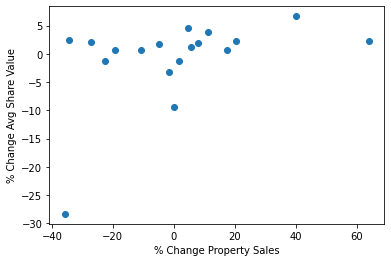

In [49]:
# set X and Y variables for our scatter plot
x_values = result['Sales']
y_values = result['Monthly Avg (%)']

# Place the variables in our scatter plot and label them
plt.scatter(x_values,y_values)
plt.xlabel('% Change Property Sales')
plt.ylabel('% Change Avg Share Value')
plt.show()

# Our Scatter Plot Shows that Share price value variation presented some stability when compared 
# with the variation in Property Sales.
# We can notice a clear exception when both variables revealed a record drop. 
# As we've seen previously this drop relates to the beginning of Q2 2020

In [47]:
# Before further exploring this data we must find out if our samples fir in a normal distribution.
# The following test returns a pvalue = 0.1888 for Change in Sales and pvalue = 6.7756 for 
# change in Share Value
# Both largely exceet a 0.05 alpha, therefor we must consider the null hypothesis and 
# cannot run a linear Regression

print(stats.normaltest(x_values))
print(stats.normaltest(y_values))

NormaltestResult(statistic=3.3334267912709192, pvalue=0.18886677708162192)
NormaltestResult(statistic=33.01469399475924, pvalue=6.775639453367553e-08)


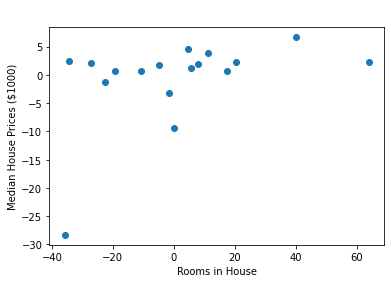

In [ ]:
labels = ['2018 Q4','2019 Q1','2019 Q2','2019 Q3','2019 Q4','2020 Q1','2020 Q2']